In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import getcwd
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from warnings import filterwarnings
%matplotlib inline

filterwarnings('ignore')

# The algorithm

The [k-means][1] algorithm is described below:
* **Initialization:** Choose the number of clusters _k_ and choose (randomly) _k_ centroids.
* Repeat until centroids do not change:
    * **Assignment:** Assign each observation to the cluster whose center is the the nearest.
    * **Update:** Calculate the new means to be the centroids of the observations in the new clusters.

The final results of the algorithm depend on the selection of some hyper-parameters, but we will discuss only one of them - **_n_\__clusters_** - the number of clusters we are looking for. The algorithm is implemented by the [KMeans][2] class, and when it's done, it returns three interesting results:

* The centers of the clusters
* The labels of the data points
* The **inertia** - a measure for the quality of the model

[1]: https://en.wikipedia.org/wiki/K-means_clustering "k-means algorithm - Wikipedia"
[2]: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html "KMeans class API"

# Illustrative example

## The data

For illustration we generate 30 points in the unit square.

In [3]:
np.random.seed(1)
data = pd.DataFrame({'x': np.random.rand(30),
                     'y': np.random.rand(30)},
                    columns=['x', 'y'])
data.head()

,x,y
0,0.417022,0.098347
1,0.720324,0.421108
2,0.000114,0.957890
3,0.302333,0.533165
4,0.146756,0.691877


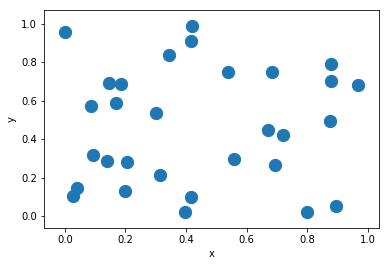

In [4]:
data.plot('x', 'y', kind='scatter', s=150)

## Apply the model

In [0]:
X = data
y = None  # Not really necessary...

We note that clustering models are not actually "fitted", so the _fit()_ method has no meaning on its own.

In [0]:
k = 2
model = KMeans(n_clusters=k).fit(X)

The prediction returns the cluster number to which each point is associated. These numbers are called **labels**, and they have no meaning.

In [7]:
data['cluster']= pd.Series(model.predict(X))
data.head()

,x,y,cluster
0,0.417022,0.098347,1
1,0.720324,0.421108,0
2,0.000114,0.957890,1
3,0.302333,0.533165,1
4,0.146756,0.691877,1


### Visualization

We make some auxiliary scripting...

In [0]:
colors = {0: 'red', 1: 'lightgreen', 2: 'blue', 3:'yellow', 
          4: 'orange', 5: 'purple', -1: 'black'}

centers_xy = pd.DataFrame(model.cluster_centers_[:, :2],
                          columns=['x', 'y'])
center_color = pd.DataFrame(-1 * np.ones((k, 1)),
                            columns=['cluster'])
center_data = pd.concat((centers_xy, center_color), axis=1)

data_with_centers = pd.concat((data, center_data), axis=0)

And plot the clusters...

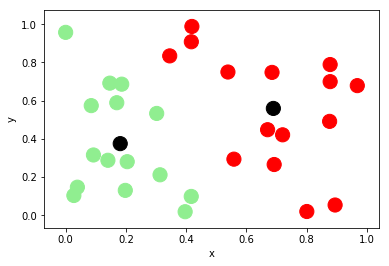

In [9]:
data_with_centers.plot('x', 'y', kind='scatter', s=200,
                       c=data_with_centers['cluster'].apply(lambda x: colors[x]))

### Model assessment

The result of the k-means algorithm is commonly measured by the **inertia**, which is the ratio between the sum of intra-cluster distances and the sum of inter-cluster distances. This measure has two big problems:

* It tends to be "better" when _k_ is increased or alternatively when the number of features is getting larger.
* It has no "normalized" value and its value depends on the "space" of the samples (similar to the RMSE measure).

#### Choosing k

Increasing _k_ usually improves the inertia, and the "elbow" point is traditionally considered a good guess for the number of clusters.

In [0]:
def calc_inertia(k):
    model = KMeans(n_clusters=k).fit(data)
    return model.inertia_

inertias = [(k, calc_inertia(k)) for k in range(1, 10)]

Text(0, 0.5, 'Inertia')

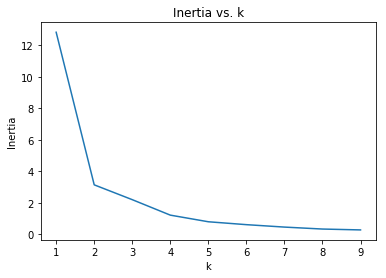

In [11]:
plt.plot(*zip(*inertias))
plt.title('Inertia vs. k')
plt.xlabel('k')
plt.ylabel('Inertia')

# Example 2 - Clustering the iris dataset

## The data

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df = iris_df.join(pd.Series(iris.target, name='Type'))
categories = dict(zip([0, 1, 2], iris.target_names))
iris_df['Type'] = iris_df['Type'].apply(lambda x: categories[x])
iris_df[::25]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


### From classification to clustering

The conceptual difference between supervised and unsupervised learning can be explained by either having or not having a color to each of the classes/clusters.

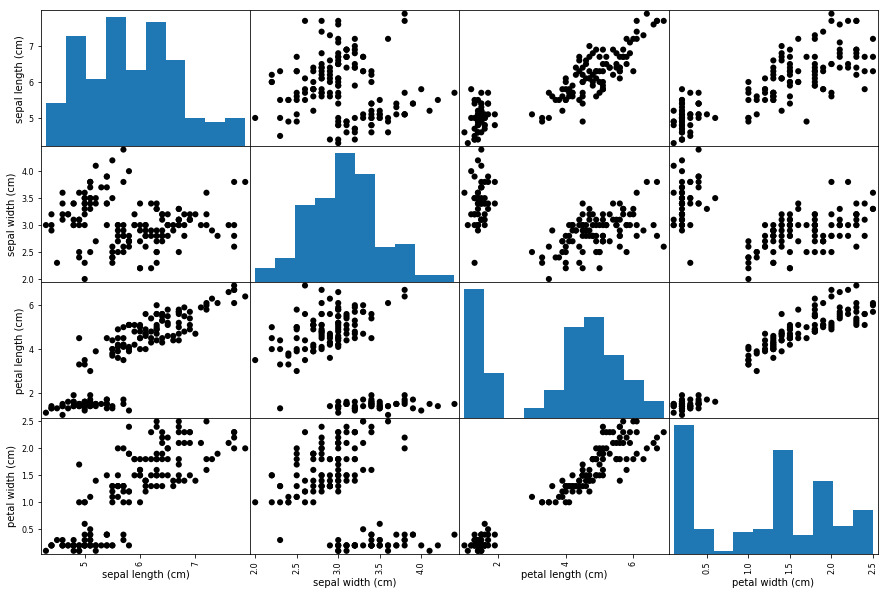

In [25]:
# iris_colors = {'setosa': 'red', 'versicolor': 'lightgreen', 'virginica': 'blue'}
iris_colors = {'setosa': 'black', 'versicolor': 'black', 'virginica': 'black'}
c = iris_df['Type'].apply(lambda x: iris_colors[x])
scatter = scatter_matrix(iris_df, figsize=(15, 10), c=c, s=150, alpha=1)

In [15]:
data = iris_df[iris.feature_names]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## The model

### Fitting

In [0]:
model = KMeans(n_clusters=3)

X = data
y = None  # Not really necessary...

cluster = pd.Series(model.fit_predict(X))

In [17]:
cluster.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

### Visualization

In [0]:
c = cluster.apply(lambda x: colors[x])
# scatter = scatter_matrix(data, figsize=(15, 10), c=c, s=150, alpha=1)

### Assessment

In [0]:
def calc_inertia(k):
    model = KMeans(n_clusters=k).fit(X)
    return model.inertia_

inertias = [(k, calc_inertia(k)) for k in range(1, 10)]

Text(0, 0.5, 'Inertia')

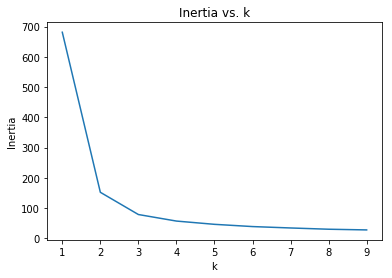

In [20]:
plt.plot(*zip(*inertias))
plt.title('Inertia vs. k')
plt.xlabel('k')
plt.ylabel('Inertia')